# Linear regression

In statistics, linear regression is a linear approach for modelling the relationship between a scalar response and one or more explanatory variables (also known as dependent and independent variables). e.g. a model that assumes a linear relationship between the input variables (x) and the single output variable (y). More specifically, that y can be calculated from a linear combination of the input variables (x).  The case of one explanatory variable is called simple linear regression

Linear regression models are often fitted using the least squares approach, but they may also be fitted in other ways, such as by minimizing the "lack of fit" in some other norm (as with least absolute deviations regression), or by minimizing a penalized version of the least squares cost function as in ridge regression ($L_2$-norm penalty) and lasso ($L_1$-norm penalty). Conversely, the least squares approach can be used to fit models that are not linear models. Thus, although the terms "least squares" and "linear model" are closely linked, they are not synonymous.

In this section, we implement least squares approch for fitting a set of data points on 2D plane

Given a set of data points, the best fit straight line equation is $$y = a_0 + a_1 x $$

where $a_0$ and $a_1$ are obtained by solving the equations:
$$
\begin{split}
n \, a_0 + \left( \Sigma x_i \right) a_1 &= \Sigma y_i \\
\left( \Sigma x_i \right)  a_0 + \left( \Sigma x_i^2 \right) a_1 &= \Sigma\, x_iy_i
\end{split}
$$

## Correlation Coefficient

How do we know how good the fit is?
By correlation coefficient

$S_r$ : Square differences between the data points and the straight line

$$ S_r = \sum_{i = 1}^{n} (y_i - a_0 - a_1x_i)^2$$

$S_t$ : Square differences between the data points and the mean

$$ S_t = \sum_{i = 1}^{n} \left(y_i - \overline{y}\right)^2$$

Coefficient of determination 

$$ r^2 = \frac{S_t - S_r}{S_t}$$

Correlation coefficient

$$r = \sqrt{r^2}$$

# Exponential Model
Exponential regression refers to the process of arriving at an equation for the exponential curve that best fits a set of data. Exponential regression is very similar to linear regression, where we try to arrive at an equation for the (straight) line that best fits a set of data.

Often, we come across situations where a set of data doesn’t follow a straight line or a parabola. In such situations, the exponential curve is generally the best fit. This includes situations where there is slow growth initially and then a quick acceleration of growth, or in situations where there is rapid decay initially and then a sudden deceleration of decay.

Given that $y = ae^{bx}$ and the linear fit equation iis $Y = a_0 + a_1X$, after simplifying we obtain that
$$ \underbrace{\ln(y)}_{Y} = \underbrace{\ln(a)}_{a_0} + \underbrace{b}_{a_1} \underbrace{x}_{X} $$

Let:
$$
\begin{split}
Y &= \ln(y)\\
X &= x\\
a_0 &= \ln(a)\\
a_1 &= b
\end{split}
$$

# Power Model

Power regression is one in which the response variable is proportional to the explanatory variable raised to a power. 

Given that $y = ax^b$ and the linear fit equation iis $Y = a_0 + a_1X$, after simplifying we obtain that
$$ \underbrace{\log(y)}_{Y} = \underbrace{\log(a)}_{a_0} + \underbrace{b}_{a_1} \underbrace{\log(x)}_{X} $$

Let:

$$
\begin{split}
Y &= \log(y)\\
X &= \log(x)\\
a_0 &= \log(a)\\
a_1 &= b
\end{split}
$$


# Growth Rate Model
 

Given that $y = \dfrac{ax}{b+x}$ and the linear fit equation iis $Y = a_0 + a_1X$, after simplifying we obtain that
$$ \underbrace{\frac{1}{y}}_{Y} = \underbrace{\frac{1}{a}}_{a_0} + \underbrace{\frac{b}{a}}_{a_1} \underbrace{\frac{1}{x}}_{X} $$

Let:

$$
\begin{split}
Y &= \frac{1}{y}\\
X &= \frac{1}{x}\\
a_0 &= \frac{1}{a}\\
a_1 &= \frac{b}{a}
\end{split}
$$

## Implementation

We define `linear_regression` function, the function takes two inputs, first input is a list of data points, second input is the model of regression, by default the model is `linear`, there are `exponential`, `power` and `growth rate` model. The function returns two values, first value is a list of parameters of the best fit equation, the second is the correlation coefficient, third input `plot_function` is optional and by default equals false, if it equals true it wil return s plot of the data points vs. the least squares solution.

In [1]:
# import needed packages
# by default, python calls list by reference, resulting in changing the original set
# using deepcopy to copy the data to prevent from changing the origninal set

from copy import deepcopy

In [2]:
def linear_regression(points, model = 'linear', plot_function = False):
    
    
    ####################################
    # implement linear model
    
    if model.lower() in ['l', 'linear']:
        
        points_linear = deepcopy(points)
        
        number_of_points = len(points_linear)

        sigma_x = 0
        for i in range(len(points_linear)):
            sigma_x += points_linear[i][0]

        sigma_y = 0
        for i in range(len(points_linear)):
            sigma_y += points_linear[i][1]

        sigma_x_squared = 0
        for i in range(len(points_linear)):
            sigma_x_squared += (points_linear[i][0])^2

        sigma_xy = 0
        for i in range(len(points_linear)):
            sigma_xy += (points_linear[i][0] * points_linear[i][1])

        A = matrix([[number_of_points, sigma_x], [sigma_x, sigma_x_squared]])

        b = matrix([[sigma_y], [sigma_xy]])

        solution = A.solve_right(b).n()

        S_r = 0
        for i in range(len(points_linear)):
            S_r += (points_linear[i][1] - list(solution.dict().values())[0] - list(solution.dict().values())[1] * points_linear[i][0])^2

        S_t = 0
        for i in range(len(points_linear)):
            S_t += (points_linear[i][1] - (sigma_y / number_of_points))^2


        correlation_coefficient = sqrt((S_t - S_r) / S_t)

        if plot_function == False:
        
            return list(solution.dict().values()), correlation_coefficient
    
        if plot_function == True:
            
            a0, a1 = var('a0 a1')

            model(x) = a0  + a1 * x
            
            linear_regression_plot = point(points) + plot(model(a0 = list(solution.dict().values())[0], a1 = list(solution.dict().values())[1]), (x, find_min_x_of_points(points), find_max_x_of_points(points) + 1), color = 'red')
            
            return list(solution.dict().values()), correlation_coefficient, linear_regression_plot
            
    
    ####################################
    # implement exponential model
    
    if model.lower() in ['e', 'exp', 'exponential']:
        
        points_exponential = deepcopy(points)
        
        for i in range(len(points_exponential)):
            points_exponential[i][1] = ln(points_exponential[i][1]).n()
            
        exponential_solution, correlation_coefficient = linear_regression(points_exponential)
         
        exponential_solution[0] = e^(exponential_solution[0])
        
        if plot_function == False:
            
            return exponential_solution, correlation_coefficient
    
        if plot_function == True:
            
            a, b = var('a b')

            model_2 = a * e^(b * x) 
            
            linear_regression_plot = point(points) + plot(model_2(a = exponential_solution[0], b = exponential_solution[1]), (x, find_min_x_of_points(points), find_max_x_of_points(points) + 1), color = 'red')
            
            return exponential_solution, correlation_coefficient, linear_regression_plot
            
    
    
    ####################################
    # implement power model
    
    if model.lower() in ['p', 'power']:
        
        points_power = deepcopy(points)
        
        for i in range(len(points_power)):
            points_power[i][0] = log(points_power[i][0], 10).n()
            points_power[i][1] = log(points_power[i][1], 10).n()
            
        power_solution, correlation_coefficient = linear_regression(points_power)
        
        power_solution[0] = 10^(power_solution[0])
        
        if plot_function == False:
        
            return power_solution, correlation_coefficient
        
        if plot_function == True:

            a, b = var('a b')

            model_3 = a * x^b 
            
            linear_regression_plot = point(points) + plot(model_3(a = power_solution[0], b = power_solution[1]), (x, find_min_x_of_points(points), find_max_x_of_points(points) + 1), color = 'red')
            
            return power_solution, correlation_coefficient, linear_regression_plot
    
    
    
    ####################################
    # implement growth rate model
    
    if model.lower() in ['g', 'growth', 'growth rate']:
        
        points_growth = deepcopy(points)
            
        for i in range(len(points_growth)):
            points_growth[i][0] = 1 / points_growth[i][0]
            points_growth[i][1] = 1 / points_growth[i][1]
            
        growth_solution, correlation_coefficient = linear_regression(points_growth)
        
        growth_solution[0] = 1 / growth_solution[0]
        growth_solution[1] = growth_solution[0] * growth_solution[1]
        
    
        if plot_function == False:
        
            return growth_solution, correlation_coefficient
        
        if plot_function == True:

            a, b = var('a b')

            model_4 = a * x / (b + x) 
            
            linear_regression_plot = point(points) + plot(model_4(a = growth_solution[0], b = growth_solution[1]), (x, find_min_x_of_points(points), find_max_x_of_points(points) + 1), color = 'red')
            
            return growth_solution, correlation_coefficient, linear_regression_plot
        
        
##############################
# To plot -> we must specify a range of x e.g. from x = 0 to x = 15
# To find that range automaticly, we define find_min_x_of_points() and find_min_x_of_points()
# which finds the minimum and maximum x value of a list of point

def find_min_x_of_points(points):
    min = points[0][0]
    for point in points:
        if point[0] < min :
            min = point[0]
    return min

def find_max_x_of_points(points):
    max = points[0][0]
    for point in points:
        if point[0] > max :
            max = point[0]
    return max

## Implementation of a graphical user interface

Using `ipywidgets` which are interactive HTML widgets for Jupyter notebooks and the IPython kernel, we can define the `GUI_linear_regression` function which enable the user to enter a list of points anf choose the model interactively.

In [3]:
import ipywidgets as widgets
from IPython.display import display


# by default, numbers in sage are from sage.rings.real_mpfr.RealLiteral
# Using R_type_cast, we can type cast any float or integer value to proper types
from sage.rings.real_mpfr import RRtoRR
R_type_cast = RealField()


def GUI_linear_regression():
    pointsgui = widgets.Text(
    value = '',
    placeholder = 'e.g. [[18, 153], [19, 156], [21, 169]]',
    description = 'Enter points: ',
    disabled = False
    )
    display(pointsgui)

    modelgui = widgets.RadioButtons(
    options=['linear', 'exponential', 'power', 'growth rate'],
    value = 'linear', # Defaults to 'linear'
    description = 'Model: ',
    disabled = False
    )
    display(modelgui)
    
    button = widgets.Button(description = 'Run')
    output = widgets.Output()

    display(button, output)

    def on_button_clicked(b):
        with output:
            show_results()
            

    button.on_click(on_button_clicked)
    
    def show_results():
        points_2_gui = eval(pointsgui.value)
        for onepoint in points_2_gui:
            onepoint[0], onepoint[1] = R_type_cast(onepoint[0]), R_type_cast(onepoint[1])
        solution_test, correlation_coefficient_test, graph_test = linear_regression(points_2_gui ,model = modelgui.value, plot_function = True)
        print(f"Parameters are {solution_test[0]}, {solution_test[1]}\nCorrelation coefficient is {correlation_coefficient_test}" )
        show(graph_test)
    


## Test with an example 1

Find the least squares fit of a straight line to the given data:


|x|18|19|21|23|23|25|34|35|37|39|42|54|56|65|72|
|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
|y|153|156|169|172|174|174|172|174|177|180|181|187|198|199|202|

plot the data points vs. the least squares solution, and find the correlation coefficient.

In [4]:
points_1 = [[18, 153], [19, 156], [21, 169], [23, 172], [23, 174], [25, 174], [34, 172], [35, 174], [37, 177], [39, 180], [42, 181], [54, 187], [56, 198], [65, 199], [72, 202]]

points_1

[[18, 153],
 [19, 156],
 [21, 169],
 [23, 172],
 [23, 174],
 [25, 174],
 [34, 172],
 [35, 174],
 [37, 177],
 [39, 180],
 [42, 181],
 [54, 187],
 [56, 198],
 [65, 199],
 [72, 202]]

Required coefficients [148.999345110692, 0.769111586748874]
Correlation coefficient = 0.935392145341174


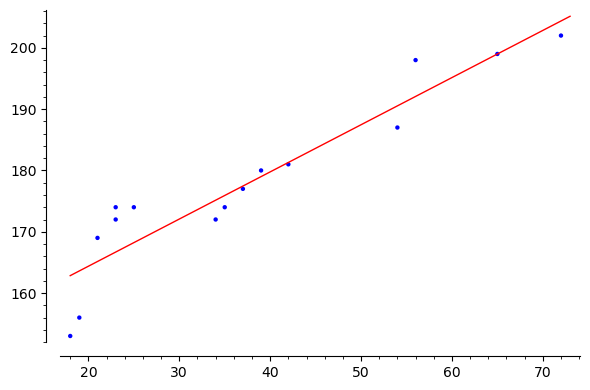

In [5]:
solution_1, correlation_coefficient_1, graph_1 = linear_regression(points_1 ,model = 'linear', plot_function = True)

print(f'Required coefficients {solution_1}\nCorrelation coefficient = {correlation_coefficient_1}')
show(graph_1)

Compare it to `find_fit` function provided by `sage`, results are almost identical

In [6]:
var('a0 a1')
model(x) = a0  + a1 * x

find_fit(points_1, model)

[a0 == 148.99934509893097, a1 == 0.7691115870622297]

## Test GUI with an example 1.1

Find the least squares fit of a straight line to the given data:


|x|5|10|15|20|25|
|-|-|-|-|-|-|
|y|-0.45|-21.13|-43.5|-72.53|-98.17|

plot the data points vs. the least squares solution, and find the correlation coefficient.

In [7]:
# points_1_gui = [[5, -0.45], [10, -21.13], [15, -43.50], [20, -72.53], [25, -98.17]]

In [8]:
GUI_linear_regression()

Text(value='', description='Enter points: ', placeholder='e.g. [[18, 153], [19, 156], [21, 169]]')

RadioButtons(description='Model: ', options=('linear', 'exponential', 'power', 'growth rate'), value='linear')

Button(description='Run', style=ButtonStyle())

Output()

## Test with an example 2

Find the least squares fit of the exponential model to the given data:


|x|1|2|3|4|5|6|7|8|9|10|
|-|-|-|-|-|-|-|-|-|-|-|
|y|620.00|621.88|899.80|1239.93|1970.63|2089.04|2751.31|3954.92|5893.7|8513.1|

plot the data points vs. the least squares solution, and find the correlation coefficient.

In [9]:
points_2 = [[1,620.00], [2,621.88], [3,899.80], [4,1239.93], [5,1970.63], [6,2089.04], [7,2751.31], [8,3954.92], [9, 5893.7], [10, 8513.1]]

points_2

[[1, 620.000000000000],
 [2, 621.880000000000],
 [3, 899.800000000000],
 [4, 1239.93000000000],
 [5, 1970.63000000000],
 [6, 2089.04000000000],
 [7, 2751.31000000000],
 [8, 3954.92000000000],
 [9, 5893.70000000000],
 [10, 8513.10000000000]]

Required coefficients [386.108386444157, 0.298007006799214]
Correlation coefficient = 0.992541929629623


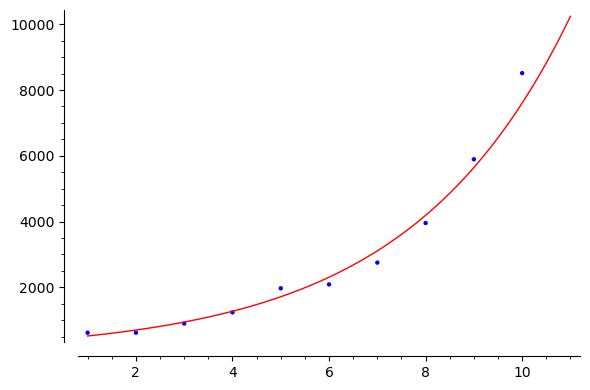

In [10]:
solution_2, correlation_coefficient_2, graph_2 = linear_regression(points_2 ,model = 'exponential', plot_function = True)

print(f'Required coefficients {solution_2}\nCorrelation coefficient = {correlation_coefficient_2}')
show(graph_2)

In [11]:
GUI_linear_regression()

Text(value='', description='Enter points: ', placeholder='e.g. [[18, 153], [19, 156], [21, 169]]')

RadioButtons(description='Model: ', options=('linear', 'exponential', 'power', 'growth rate'), value='linear')

Button(description='Run', style=ButtonStyle())

Output()

## Test with an example 3

Find the least squares fit of the power model to the given data:


|x|1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|
|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
|y|0.339|2.082|6.731|16.799|35.423|75.224|117.506|162.077|197.054|337.557|405.831|603.241|643.630|830.005|879.403|

plot the data points vs. the least squares solution, and find the correlation coefficient.

In [12]:
points_3 = [[1, 0.339], [2, 2.082], [3, 6.731], [4, 16.7995], [5, 35.423], [6, 75.224], [7, 117.506], [8, 162.077], [9, 197.054], [10, 337.557], [11, 405.831], [12, 603.241], [13, 643.630], [14, 830.005], [15, 879.403]]
points_3

[[1, 0.339000000000000],
 [2, 2.08200000000000],
 [3, 6.73100000000000],
 [4, 16.7995000000000],
 [5, 35.4230000000000],
 [6, 75.2240000000000],
 [7, 117.506000000000],
 [8, 162.077000000000],
 [9, 197.054000000000],
 [10, 337.557000000000],
 [11, 405.831000000000],
 [12, 603.241000000000],
 [13, 643.630000000000],
 [14, 830.005000000000],
 [15, 879.403000000000]]

Required coefficients [0.289032615005079, 3.01877203227069]
Correlation coefficient = 0.998729161187500


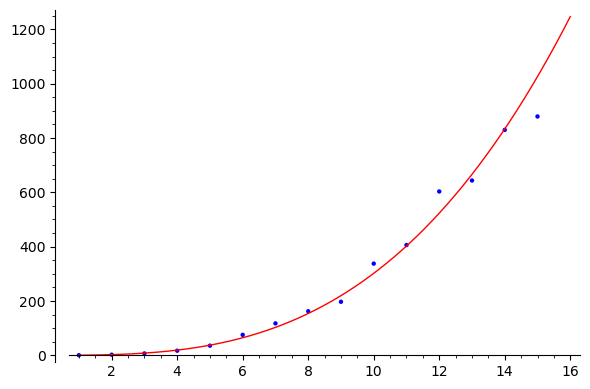

In [13]:
solution_3, correlation_coefficient_3, graph_3 = linear_regression(points_3 ,model = 'power', plot_function = True)

print(f'Required coefficients {solution_3}\nCorrelation coefficient = {correlation_coefficient_3}')
show(graph_3)

In [14]:
GUI_linear_regression()

Text(value='', description='Enter points: ', placeholder='e.g. [[18, 153], [19, 156], [21, 169]]')

RadioButtons(description='Model: ', options=('linear', 'exponential', 'power', 'growth rate'), value='linear')

Button(description='Run', style=ButtonStyle())

Output()

## Test with an example 4

Find the least squares fit of the growth rate model to the given data:


|x|1|3|5|7|9|
|-|-|-|-|-|-|
|y|0.85|1.4|1.73|1.68|1.96|



plot the data points vs. the least squares solution, and find the correlation coefficient.

In [15]:
points_4 = [[1, 0.85], [3, 1.4], [5, 1.73], [7, 1.68], [9, 1.96]]

points_4

[[1, 0.850000000000000],
 [3, 1.40000000000000],
 [5, 1.73000000000000],
 [7, 1.68000000000000],
 [9, 1.96000000000000]]

Required coefficients [2.19177854653905, 1.58559002228765]
Correlation coefficient = 0.995146563071319


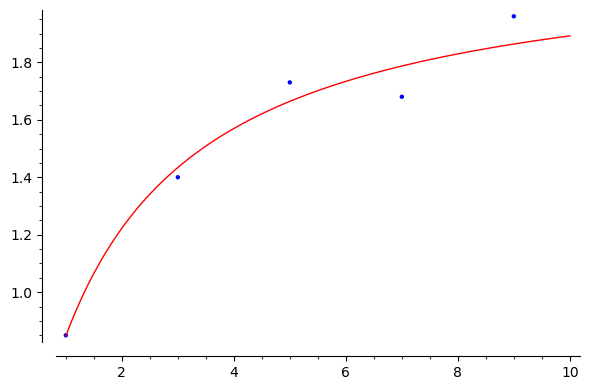

In [16]:
solution_4, correlation_coefficient_4, graph_4 = linear_regression(points_4 ,model = 'growth', plot_function = True)

print(f'Required coefficients {solution_4}\nCorrelation coefficient = {correlation_coefficient_4}')
show(graph_4)

In [17]:
GUI_linear_regression()

Text(value='', description='Enter points: ', placeholder='e.g. [[18, 153], [19, 156], [21, 169]]')

RadioButtons(description='Model: ', options=('linear', 'exponential', 'power', 'growth rate'), value='linear')

Button(description='Run', style=ButtonStyle())

Output()